# Boston

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력층: 예측 값이 하나인 회귀 문제

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='mse',  # 평균 제곱 오차
              metrics=['mae'])  # 평균 절대 오차

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# 훈련/검증 데이터 분리
x_val = train_data[:100]  # 검증용 데이터 (100개)
partial_x_train = train_data[100:]  # 훈련 데이터 (나머지)

y_val = train_labels[:100]  # 검증 레이블
partial_y_train = train_labels[100:]  # 훈련 레이블

# 모델 학습
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,  # 학습 반복 횟수
    batch_size=10,  # 배치 크기
    validation_data=(x_val, y_val),  # 검증 데이터
    verbose=1  # 학습 진행 상태 표시
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 568.5884 - mae: 22.1910 - val_loss: 459.4257 - val_mae: 19.2988
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 463.4020 - mae: 19.3364 - val_loss: 261.8826 - val_mae: 13.9110
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 231.7993 - mae: 12.7274 - val_loss: 78.7054 - val_mae: 6.6852
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 89.2359 - mae: 7.3584 - val_loss: 43.2699 - val_mae: 4.7129
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40.2249 - mae: 4.9550 - val_loss: 28.2486 - val_mae: 3.5905
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.6686 - mae: 3.8357 - val_loss: 23.1204 - val_mae: 3.1775
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.3451 - mae: 3.5574 - val_loss: 20.4912 - val_mae: 2.9949
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.4252 - mae: 3.1356 - val_loss: 18.7937 - val_mae: 2.8847
Epoch 9/100
31/31 ━━━━━━━━━━━━

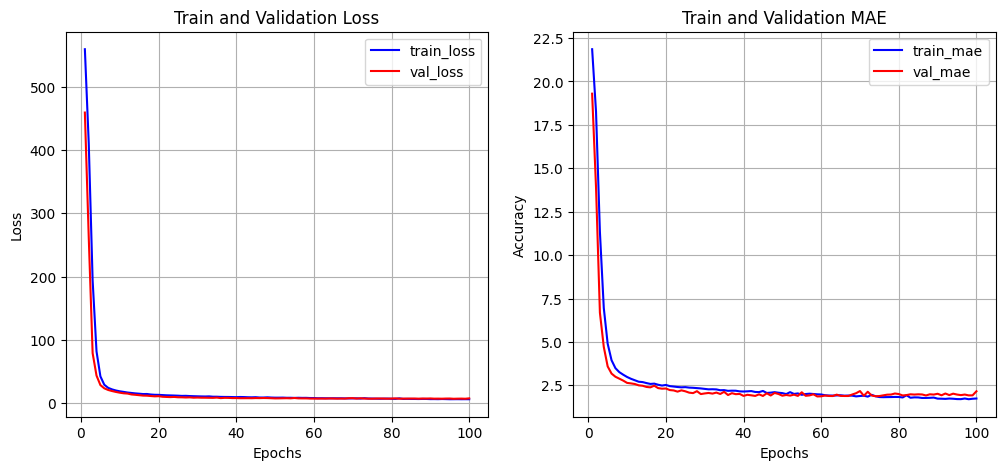

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.


history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 테스트 데이터셋으로 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.9113 - mae: 2.7505 
Test Loss: 20.1511
Test MAE: 2.8939


# Reuters

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋을 훈련용 데이터와 검증용 데이터로 나눕니다.
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
6736
2246
2246
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,266,734 (20.09 MB)

 Trainable params: 5,265,198 (20.09 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [16]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras', save_best_only=True, monitor='val_loss', mode='min'
)
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.3055 - loss: 3.6199 - val_accuracy: 0.6581 - val_loss: 3.1942
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.7254 - loss: 1.3465 - val_accuracy: 0.7395 - val_loss: 2.8626
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.8166 - loss: 0.8958 - val_accuracy: 0.7649 - val_loss: 2.6937
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8660 - loss: 0.6510 - val_accuracy: 0.7729 - val_loss: 2.5784
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.9011 - loss: 0.4600 - val_accuracy: 0.7760 - val_loss: 2.4149
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.9157 - loss: 0.3687 - val_accuracy: 0.7729 - val_loss: 2.2490
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9398 - loss: 0.2826 - val_accuracy: 0.7654 - val_loss: 2.0949
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.9415 - loss: 0.2594 - val_accuracy: 0.

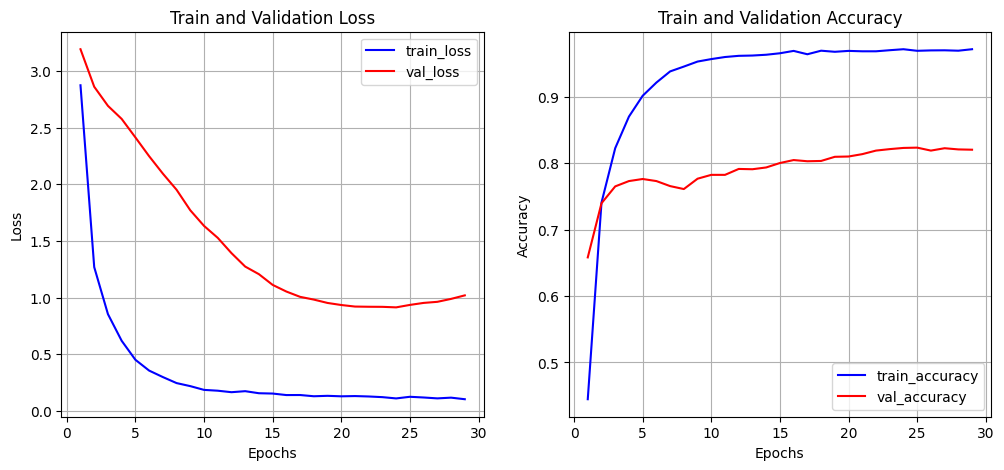

In [18]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8003 - loss: 0.9941
Test Loss: 1.018081784248352
Test Accuracy: 0.7943009734153748


# CIFAR10

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [21]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 정규화 (픽셀 값을 0~1 범위로 스케일링)
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 훈련 데이터셋을 훈련용 데이터와 검증용 데이터로 나눕니다.
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 221s 1us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [22]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

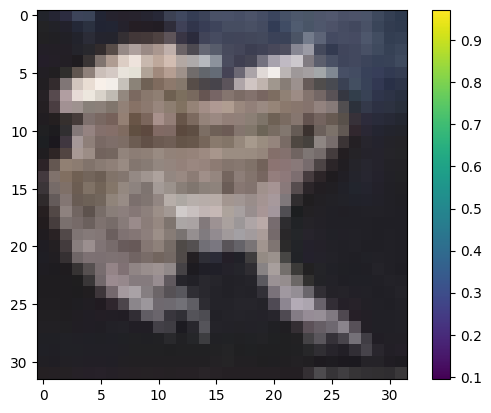

In [24]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.


plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [25]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [27]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [28]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [30]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint = callbacks.ModelCheckpoint(
    'best_model_cifar10.keras', save_best_only=True, monitor='val_loss', mode='min'
)
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.2314 - loss: 2.5137 - val_accuracy: 0.1030 - val_loss: 2.3062
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.3186 - loss: 1.9584 - val_accuracy: 0.1030 - val_loss: 2.3049
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3512 - loss: 1.8320 - val_accuracy: 0.1031 - val_loss: 2.2930
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.3624 - loss: 1.7828 - val_accuracy: 0.1085 - val_loss: 2.2643
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.3871 - loss: 1.7378 - val_accuracy: 0.1923 - val_loss: 2.1735
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3917 - loss: 1.7077 - val_accuracy: 0.2708 - val_loss: 2.0526
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.4039 - loss: 1.6773 - val_accuracy: 0.2770 - val_loss: 2.0304
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.4127 - loss: 1.6592 - val_accuracy: 0.3645 -

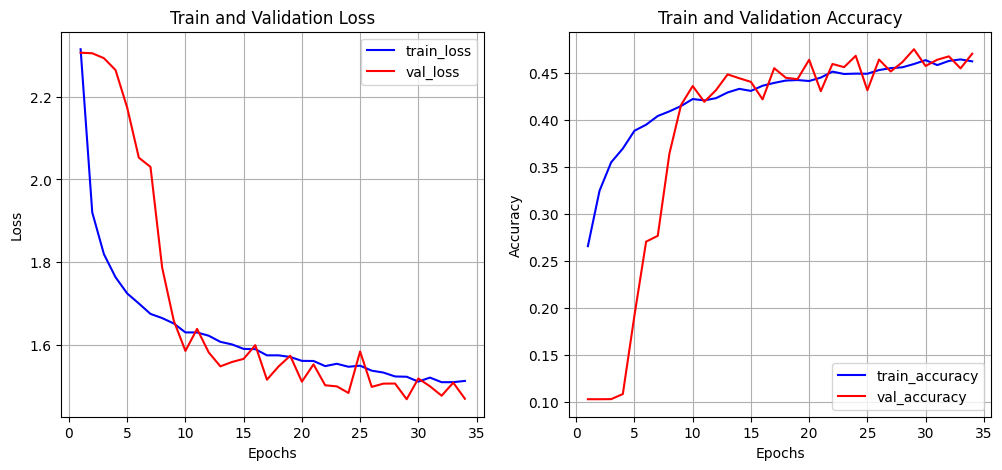

In [33]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


In [34]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4797 - loss: 1.4629


[1.4683618545532227, 0.4778999984264374]